<a href="https://colab.research.google.com/github/NavneetSajwan/Hindi-Vowel-Consonant-Classification/blob/master/Hindi_Vowel_Consonant_Classification_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from time import time

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [0]:
from torchvision import models

# Data Fetching

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.environ['KAGGLE_USERNAME'] = "navneetsajwan" 
os.environ['KAGGLE_KEY'] = "fc19a2773ae7ed2042f95e40250fa407" 

In [5]:
!kaggle competitions download -c padhai-hindi-vowel-consonant-classification

  0% 0.00/145k [00:00<?, ?B/s]
100% 145k/145k [00:00<00:00, 44.4MB/s]
 80% 73.0M/91.3M [00:01<00:00, 37.8MB/s]
100% 91.3M/91.3M [00:01<00:00, 67.5MB/s]
 93% 85.0M/91.3M [00:01<00:00, 35.9MB/s]
100% 91.3M/91.3M [00:02<00:00, 46.0MB/s]


In [6]:
os.getcwd()

'/content'

In [0]:
# !unzip -q test.zip

In [0]:
!unzip -q train.zip

In [0]:
files=os.listdir('train/')

In [7]:
len(files)

10000

In [8]:
files[0]

'V1_C9_82.png'

In [9]:
vowel=int(files[0][1])
type(vowel)
# print(vowel)


int

In [0]:
y_vowel=[]
y_consonant=[]
for file in files:
  vowel_idx=int(file[1])
  cons_idx=int(file[4])
  y_vowel.append(vowel_idx)
  y_consonant.append(cons_idx)

In [11]:
print(min(y_vowel),max(y_vowel))
print(min(y_consonant),max(y_consonant))


0 9
0 9


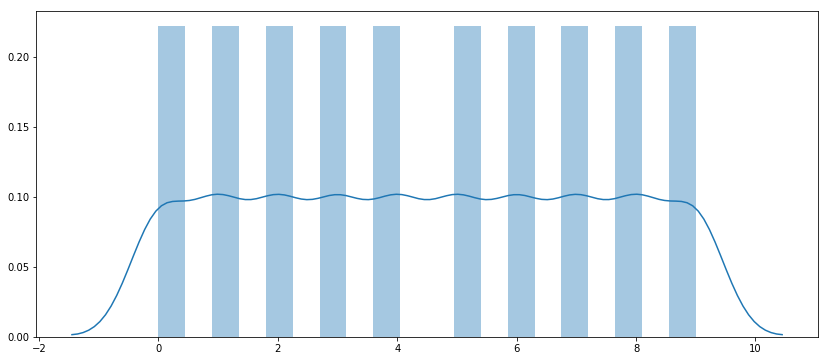

In [12]:
plt.figure(figsize=(14,6))
sns.distplot(y_vowel)

In [0]:
import pandas as pd
df= pd.read_csv("/content/drive/My Drive/vowel-consonant-mapping - Hindi.csv")

In [14]:
df.head(12)

,Unnamed: 0,Unnamed: 1,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,NaN,NaN,0,आ,इ,ई,उ,ऊ,ऋ,ए,ऐ,ऑ,ओ,औ
1,C0,0,अ,आ,इ,ई,उ,ऊ,ऋ,ए,ऐ,ऑ,ओ,औ
2,C1,क,क,का,कि,की,कु,कू,कृ,के,कै,कॉ,को,कौ
3,C2,ख,ख,खा,खि,खी,खु,खू,खृ,खे,खै,खॉ,खो,खौ
4,C3,ग,ग,गा,गि,गी,गु,गू,गृ,गे,गै,गॉ,गो,गौ
5,C4,घ,घ,घा,घि,घी,घु,घू,घृ,घे,घै,घॉ,घो,घौ
6,C5,ङ,ङ,ङा,ङि,ङी,ङु,ङू,ङृ,ङे,ङै,ङॉ,ङो,ङौ
7,C6,च,च,चा,चि,ची,चु,चू,चृ,चे,चै,चॉ,चो,चौ
8,C7,छ,छ,छा,छि,छी,छु,छू,छृ,छे,छै,छॉ,छो,छौ
9,C8,ज,ज,जा,जि,जी,जु,जू,जृ,जे,जै,जॉ,जो,जौ


In [0]:
vowels=list(df.iloc[1,2:12])
consonants= list(df.iloc[1:11,1])

In [16]:
len(consonants)

10

## Converting image into arrays



In [0]:
transformer = transforms.Compose([
                                  # transforms.Grayscale(1),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,),(0.5,))
                                ])

In [0]:
# image, vow, cons=trainset.__getitem__(3)
# print(image)

In [0]:
class DatasetHindi(Dataset):
  def __init__(self, folderpath, images_list, l_vowel=None, l_cons=None, transform=None ):
    self.folder_path=folderpath
    self.images_list =  images_list
    self.l_vowel = l_vowel
    self.l_cons = l_cons
    self.transform= transform

  def __len__(self):
    return len(self.images_list)

  def __getitem__(self, index):
    filepath= os.path.join(self.folder_path, self.images_list[index])
    image = Image.open(filepath).convert('RGB')
    # image= transforms.functional.adjust_brightness(image,2)
    # image = transforms.functional.adjust_contrast(image, 2)
    # image = transforms.functional.adjust_saturation(image,2)
    
    # torchvision.transforms.functional.to_tensor(image)
    # image = np.array(image).astype(np.uint8)
    # if image.shape[2]==4:
    #   image = image[:,:,:-1]
    # Reshaping the image to torchvision tensors
    # image = np.transpose(image, (2,0,1))
    # print(image.shape)
    if self.transform is not None:
      # print(image.shape)
      image = self.transform(image)
      # print(image.shape)
    if self.l_vowel is not None:
      l_v = self.l_vowel[index]

    if self.l_cons is not None:
      l_c = self.l_cons[index]

    return image, l_v, l_c

In [20]:
trainset = DatasetHindi('train/', files, y_vowel, y_consonant, transform=transformer)
batch=16
trainloader=DataLoader(trainset, batch_size= batch, shuffle= True)
image, lab_vowel, lab_cons= iter(trainloader).next()
image.shape
# print(lab_vowel)
# displaying the image post transforms


torch.Size([16, 3, 64, 64])

Text(0.5, 0, 'च इ')

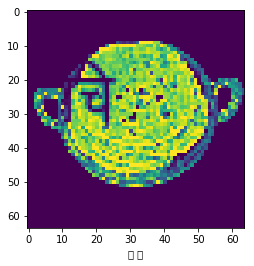

In [21]:
npimg=np.array(image)
npimg= np.transpose(npimg, (0,2,3,1))
sample = np.random.randint(batch)
# sample=3
#Transformed Image
plt.figure()
plt.imshow(npimg[sample,:,:,0])
plt.xlabel(str(consonants[lab_cons[sample]])+" "+str(vowels[lab_vowel[sample]]))

# Creating the Network Class

In [22]:
device="cuda" if torch.cuda.is_available() else "cpu"
type(device)

str

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model= nn.Sequential(
            nn.Conv2d(1,6,5), #(28,28,1)------>(24,24,6)
            nn.Tanh(),
            # nn.Conv2d(6,6,5), #(24,24,6)------>(20,20,6)
            # nn.ReLU(),
            nn.AvgPool2d(2, stride=2), #(24,24,6)------>(12,12,6)
            nn.Conv2d(6,16,5), # (12,12,6)-------->(8,8,16)
            nn.Tanh(),
            # nn.Conv2d(16,16,3), # (26,26,16)-------->(24,24,16)
            # nn.ReLU(),
            nn.AvgPool2d(2, stride=2), #(8,8,16)-------->(4,4,16)
            # nn.Conv2d(16,16,3), # (12,12,16)-------->(10,10,16)
            # nn.Tanh(),
            # nn.Conv2d(16,16,3), # (10,10,16)-------->(8,8,16)
            # nn.ReLU(),
            # nn.MaxPool2d(2, stride=2) #(8,8,16)-------->(4,4,16)
            )
            
        self.fc_model=nn.Sequential(
            nn.Linear(2704,256),
            # nn.Dropout(0.1),
            nn.Tanh(),
            nn.Linear(256,84),
            nn.Tanh(),
            nn.Linear(84,10),
            # nn.Tanh(),
            )
            
        
    def forward(self,x):
#         print(x.shape)
        x = self.cnn_model(x)
#         print(x.shape)
        x = x.view(x.size(0),-1)
#         print(x.shape)
        x = self.fc_model(x)
#         print(x.shape)
        return x

In [0]:
model=models.resnet18(pretrained=True)

In [25]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [26]:
for param in model.parameters():
  param.requires_grad=False
final_in_features= model.fc.in_features
model.fc=nn.Linear(final_in_features, out_features=10 , bias=True)
for param in model.parameters():
  if param.requires_grad== True:
    print(param.shape)



torch.Size([10, 512])
torch.Size([10])


# Creating the Evaluation function

In [0]:
def evaluation(dataloader, model):
    total, correct=0,0
    for data in dataloader:
        inputs, lab_v, lab_c= data
        inputs, lab_v= inputs.to(device), lab_v.to(device)
        outputs = model(inputs.double())
        _, pred =torch.max(outputs, 1)
        total+= lab_v.size(0)
        correct+= (pred==lab_v).sum().item()
    return pred, 100* correct/total


## Creating the Network Object

In [0]:
model = model.double().to(device)
# for param in model.parameters():
#     nn.init.xavier_uniform_(param.unsqueeze(dim=1))
#     param.squeeze()
loss_fn=nn.CrossEntropyLoss()


In [0]:
opt=optim.Adam(model.parameters(), lr=0.003 )

## Loading into dataloaders

In [0]:
import copy

In [0]:
batch= 256
trainloader = DataLoader(trainset, batch_size=batch, shuffle=False, num_workers=1)
# evalloader= DataLoader(evalset, batch_size=batch_size, shuffle=False)
# testloader= DataLoader(testset, batch_size=X_test.shape[0],shuffle=False)

# Training the Network

Epoch: 0 Iteration: 0/40 Loss: 2.710
Epoch: 0 Iteration: 4/40 Loss: 2.590
Epoch: 0 Iteration: 8/40 Loss: 2.481
Epoch: 0 Iteration: 12/40 Loss: 2.282
Epoch: 0 Iteration: 16/40 Loss: 2.188
Epoch: 0 Iteration: 20/40 Loss: 2.156
Epoch: 0 Iteration: 24/40 Loss: 2.240
Epoch: 0 Iteration: 28/40 Loss: 2.103
Epoch: 0 Iteration: 32/40 Loss: 2.133
Epoch: 0 Iteration: 36/40 Loss: 2.109
Epoch: 1 Iteration: 0/40 Loss: 2.035
Epoch: 1 Iteration: 4/40 Loss: 2.112
Epoch: 1 Iteration: 8/40 Loss: 2.035
Epoch: 1 Iteration: 12/40 Loss: 1.932
Epoch: 1 Iteration: 16/40 Loss: 1.969
Epoch: 1 Iteration: 20/40 Loss: 1.946
Epoch: 1 Iteration: 24/40 Loss: 1.992
Epoch: 1 Iteration: 28/40 Loss: 1.919
Epoch: 1 Iteration: 32/40 Loss: 1.960
Epoch: 1 Iteration: 36/40 Loss: 1.936
Epoch: 2 Iteration: 0/40 Loss: 1.970
Epoch: 2 Iteration: 4/40 Loss: 1.967
Epoch: 2 Iteration: 8/40 Loss: 1.951
Epoch: 2 Iteration: 12/40 Loss: 1.827
Epoch: 2 Iteration: 16/40 Loss: 1.886
Epoch: 2 Iteration: 20/40 Loss: 1.870
Epoch: 2 Iteration: 2

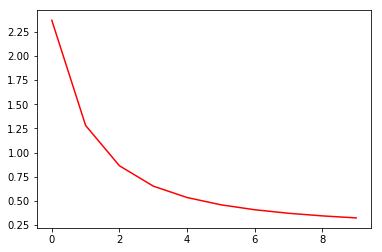

Loss:
Training Accuracy: 36.77


In [32]:
tic=time()
model.train()
loss_per_epoch=[]
loss_arr=[]
max_epochs=10
min_loss=1000
n_iters=np.ceil(10000/batch)
for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        inputs, lab_v, lab_c= data
        inputs, lab_v=inputs.to(device), lab_v.to(device)
        opt.zero_grad()
        outputs=model(inputs.double())
        loss=loss_fn(outputs, lab_v)
        loss_arr.append(loss.item())
        loss.backward()
        opt.step()
        if min_loss>loss.item():
            min_loss=loss.item()
            best_model=copy.deepcopy(model.state_dict())
        if i % 8==0:
            print("Epoch: %d Iteration: %d/%d Loss: %0.3f" %(epoch, i, n_iters, loss.item()))
        del inputs, lab_v, outputs
        torch.cuda.empty_cache()
    loss_per_epoch.append(loss.item())
toc=time()
print("Training time:", toc-tic)
plt.plot(loss_per_epoch, 'r')
plt.show()
model.eval()
# torch.save(best_model,"../input/checkpoint/best_model.pth")
model.load_state_dict(best_model)
with torch.no_grad():
  _, acc= evaluation(trainloader, model)
print("Loss:")
print("Training Accuracy: %0.2f" %( acc ))
# print("Test Accuracy: %0.2f" %(evaluation(evalloader,model)))

In [38]:
from sklearn.metrics import confusion_matrix
# batch= 512
trainloader = DataLoader(trainset, batch_size=1000, shuffle=False, num_workers=0)
model.eval()
with torch.no_grad():
  pred, _ = evaluation(trainloader, model)
cm= confusion_matrix(pred.cpu(), y_vowel[:1000])
print(cm)

[[15 18 13 18 27 15 20 14 20 15]
 [ 9  5  9  3  2  4  3  9  9  3]
 [10 17  6  7 14 15 11 10  6  7]
 [ 8  6 11  8 12  7 11 10 20 13]
 [ 7  3  5 13  2  5  7  8  6  6]
 [ 7  9  8 10 14 11  9  7 14  8]
 [ 2  4  6  5  6  4  3  6  5  6]
 [30 28 31 25 27 29 22 26 13 15]
 [ 5  3  4  0  2  4  3  4  2  3]
 [ 5  6  6  7  8  6 12 13  8  7]]


In [37]:
cm= confusion_matrix(pred.cpu(), y_vowel[:1000])
print(cm)

[[15 18 13 18 27 15 20 14 20 15]
 [ 9  5  9  3  2  4  3  9  9  3]
 [10 17  6  7 14 15 11 10  6  7]
 [ 8  6 11  8 12  7 11 10 20 13]
 [ 7  3  5 13  2  5  7  8  6  6]
 [ 7  9  8 10 14 11  9  7 14  8]
 [ 2  4  6  5  6  4  3  6  5  6]
 [30 28 31 25 27 29 22 26 13 15]
 [ 5  3  4  0  2  4  3  4  2  3]
 [ 5  6  6  7  8  6 12 13  8  7]]
